In [1]:
import pandas as pd #pandas
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance_claims_clean.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,Unknown,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Data Checking

##### The data is already checked and cleaned in excel. So there are no expected issues with the data set.

In [3]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.961000,546238.648000,1134.000000,1256.940110,1.103000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.126378,257063.005276,610.669237,243.902327,2.296446e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,0.000000e+00,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1090.567500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.595000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         225
Other        197
Ambulance    195
Name: count, dtype: int64

In [6]:
df['authorities_contacted'] = df['authorities_contacted'].fillna('No_Authority')
df['authorities_contacted'].value_counts()

authorities_contacted
Police          292
Fire            225
Other           197
Ambulance       195
No_Authority     91
Name: count, dtype: int64

# Data Engineering

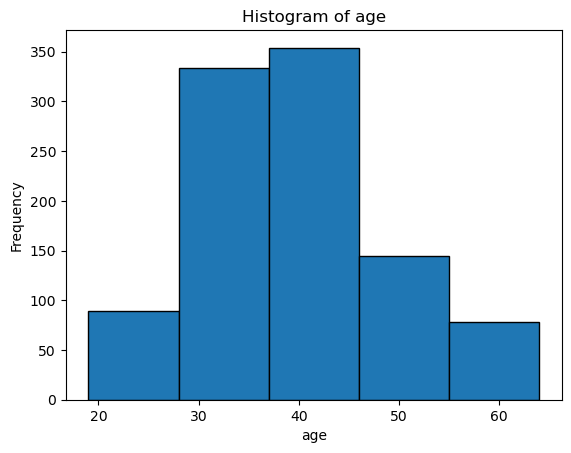

In [7]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

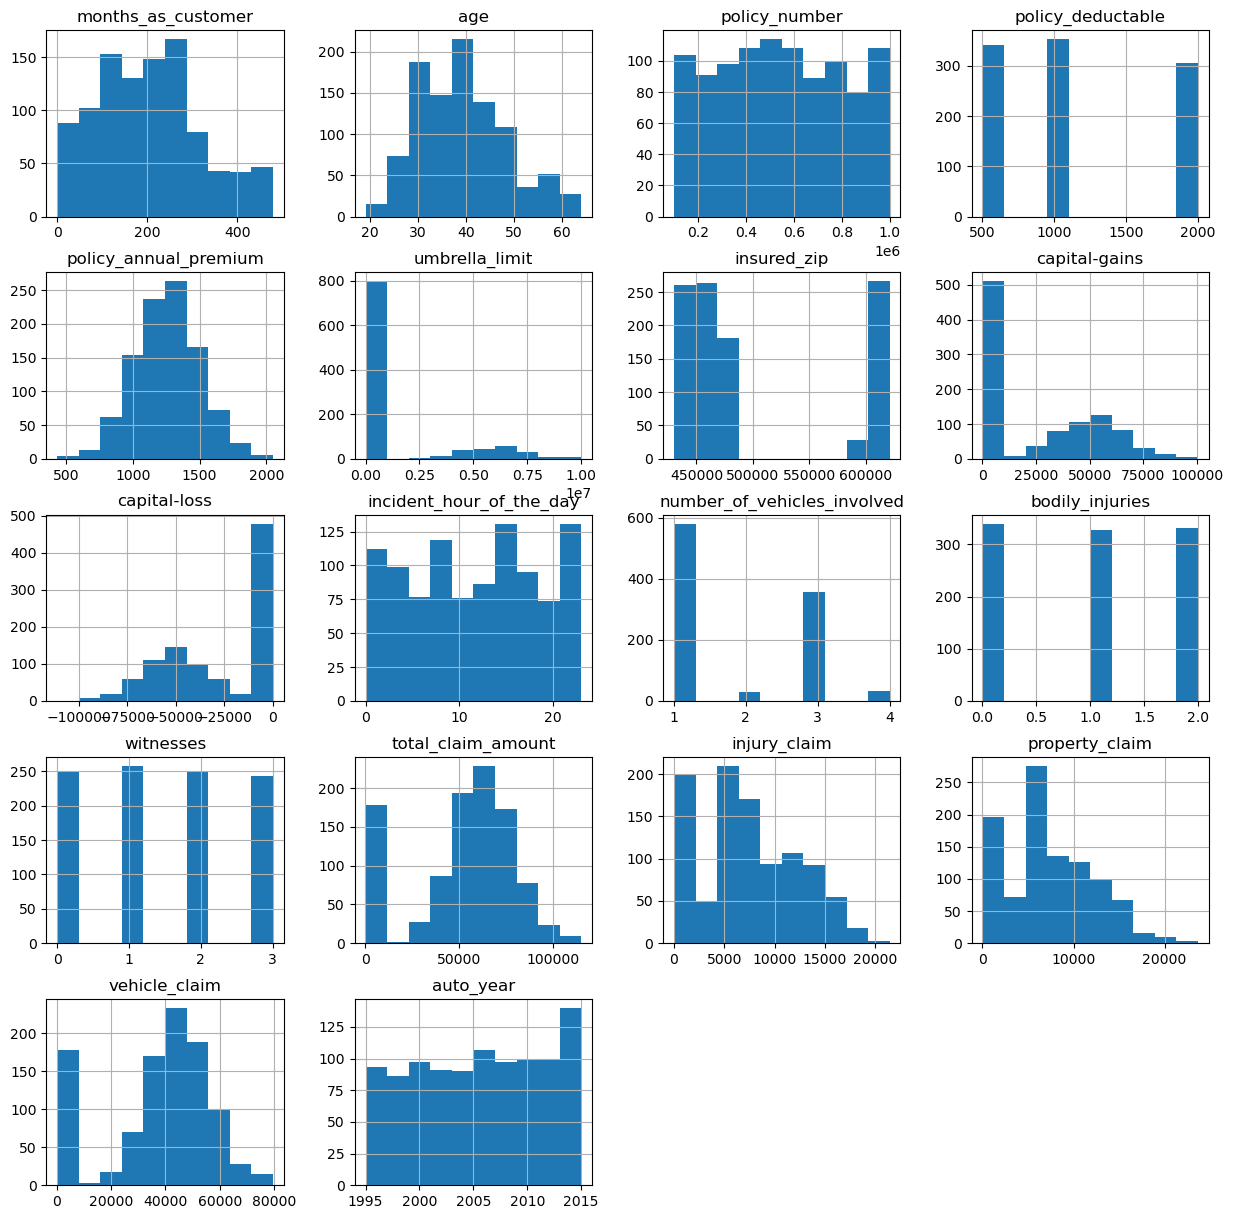

In [8]:
df.hist(figsize = (15,15))
plt.show()

In [9]:
#New Features
df['Contract Years'] = df['months_as_customer']/12
df['total_premiums_paid'] = (df['policy_annual_premium']) * df['Contract Years']
df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,27.333333,38455.540000,-33154.460000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,19.000000,22747.180000,17677.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,11.166667,15780.063333,-18869.936667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,21.333333,30202.453333,-33197.546667
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,19.000000,30094.290000,23594.290000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [45]:
df.to_csv('Claims Data clean & enhanced.csv')

# Building a classification model

In [11]:
unique_counts = df.nunique()

#converting the info to a DataFrame
unique_counts_df = unique_counts.reset_index()
unique_counts_df.columns = ['Column', 'Unique_values']

unique_counts_df['Data_Type'] = [df[col].dtype for col in df.columns] #Add datatype

unique_counts_df = unique_counts_df.sort_values('Unique_values', ascending=True) #sorting by number of unique values

unique_counts_df

,Column,Unique_values,Data_Type
27,property_damage,2,object
38,fraud_reported,2,object
10,insured_sex,2,object
4,policy_state,3,object
5,policy_csl,3,object
6,policy_deductable,3,int64
30,police_report_available,3,object
28,bodily_injuries,3,int64
20,incident_severity,4,object
26,number_of_vehicles_involved,4,int64


In [12]:
unique_counts_df[(unique_counts_df['Data_Type']=='object') & (unique_counts_df['Unique_values']>10)]

,Column,Unique_values,Data_Type
35,auto_make,14,object
12,insured_occupation,14,object
13,insured_hobbies,20,object
36,auto_model,39,object
17,incident_date,60,object
3,policy_bind_date,951,object
24,incident_location,1000,object


In [13]:
#Extracting only relevant columns for my model:
###Object/Categorical features with more than 10 categories are removed given there is only 1000 observations.
df2 = df.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_hobbies','insured_occupation','auto_make'], axis=1)
df2.shape

(1000, 35)

In [14]:
df2.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,2004,Y,27.333333,38455.540000,-33154.460000
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Unknown,5070,780,780,3510,2007,Y,19.000000,22747.180000,17677.180000
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,2007,N,11.166667,15780.063333,-18869.936667
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,2014,Y,21.333333,30202.453333,-33197.546667
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,2009,N,19.000000,30094.290000,23594.290000


In [15]:
df2['fraud_reported'].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

In [16]:
#import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample

In [22]:
X = df2.drop(['fraud_reported'], axis=1)
y = df2['fraud_reported']

In [23]:
X = pd.get_dummies(X)
X.shape

(1000, 78)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.20)

# Random forest without resampling data

In [26]:
rf = RandomForestClassifier(random_state=11)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [27]:
y_test_pred_rf = rf.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test, y_test_pred_rf), columns=['N', 'Y'], index=['N', 'Y']))
print(classification_report(y_test, y_test_pred_rf))

     N   Y
N  133  16
Y   30  21
              precision    recall  f1-score   support

           N       0.82      0.89      0.85       149
           Y       0.57      0.41      0.48        51

    accuracy                           0.77       200
   macro avg       0.69      0.65      0.66       200
weighted avg       0.75      0.77      0.76       200



In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
y_test_pred_df = dt.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test, y_test_pred_df), columns=['N', 'Y'], index=['N', 'Y']))
print(classification_report(y_test, y_test_pred_df))

     N   Y
N  116  33
Y   25  26
              precision    recall  f1-score   support

           N       0.82      0.78      0.80       149
           Y       0.44      0.51      0.47        51

    accuracy                           0.71       200
   macro avg       0.63      0.64      0.64       200
weighted avg       0.73      0.71      0.72       200



# Combine training data for resampling

In [30]:
resamp_data = pd.concat([X_train, y_train],axis=1)

In [31]:
resamp_data.shape

(800, 79)

In [32]:
fraud_Y = resamp_data[resamp_data['fraud_reported']=='Y']
fraud_N = resamp_data[resamp_data['fraud_reported']=='N']
print(fraud_Y.shape)
print(fraud_N.shape)

(196, 79)
(604, 79)


In [33]:
fraud_Y_resize = resample(fraud_Y, random_state=11, n_samples=len(fraud_N), replace=True)

In [34]:
fraud_Y_resize.shape

(604, 79)

In [35]:
df_resampled = pd.concat([fraud_N, fraud_Y_resize])
df_resampled.shape

(1208, 79)

In [36]:
X_train_resampled = df_resampled.iloc[:,:-1]
y_train_resampled = df_resampled.iloc[:,-1]

In [37]:
df_resampled.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_Unknown,police_report_available_YES,fraud_reported
832,295,46,863749,500,1265.84,0,605743,52200,-44500,10,...,False,False,False,False,False,True,False,False,True,N
797,136,33,804608,1000,855.14,0,458582,37900,0,23,...,False,True,False,False,False,True,False,False,True,N
49,192,35,582011,1000,1245.89,0,435481,0,-40300,19,...,False,False,False,True,True,False,False,True,False,N
867,212,39,167466,1000,1255.35,0,454176,60300,-58900,22,...,False,False,True,False,True,False,False,False,True,N
514,479,60,232854,2000,1304.83,0,473638,0,0,18,...,False,False,False,False,True,False,True,False,False,N


# Training a model - Random Forest

In [38]:
rf_model = RandomForestClassifier(random_state=11)

In [39]:
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=11)

In [40]:
y_test_pred = rf_model.predict(X_test)

In [41]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[125  24]
 [ 22  29]]
              precision    recall  f1-score   support

           N       0.85      0.84      0.84       149
           Y       0.55      0.57      0.56        51

    accuracy                           0.77       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.77      0.77      0.77       200



# Train logistic regression

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(X_train_resampled, y_train_resampled)

C:\Users\monde\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_test_pred_lr = lr.predict(X_test)
print(confusion_matrix(y_test, y_test_pred_lr))
print(classification_report(y_test, y_test_pred_lr))

[[82 67]
 [23 28]]
              precision    recall  f1-score   support

           N       0.78      0.55      0.65       149
           Y       0.29      0.55      0.38        51

    accuracy                           0.55       200
   macro avg       0.54      0.55      0.51       200
weighted avg       0.66      0.55      0.58       200



# Conclusion

### The Random Forest Model (rf_model) achieved best results for the classification exercise.
This model can therefore be used to estimate whether a claim may be fraudulant or not with 0.77 F1 score. Where the model suggest that claim may be fraudulant, more investigation would be required otherwise claim must be accepted.

At this stage, I'd save the model and deploy for usage.